## Objectif

Rétablir le CNN 2 à partir de sa sauvegarde, soit un CNN entrainé sur 40 epochs, et l'entrainer encore plus pour essayer d'atteindre des performances optimales.

En effet, les ressources machines faisant défaut, il reste nécessaire d'entrainer le CNN sur plusieurs étapes.

In [7]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from lib import ressources as res
racine = os.path.abspath(os.path.realpath(res.dir_root))

In [2]:
from tensorflow import keras

path_cnn = res.dir_dataset + '_cnn_2.save'

classifier = keras.models.load_model(path_cnn)

epochs_start_value = 41
epochs_added = 40

In [10]:
# entrainement du CNN

# augmentation du jeu d'images
from keras.preprocessing.image import ImageDataGenerator


# préparation du traitement de génération de nouvelles images pour le jeu d'entrainement
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# préparation du traitement de génération de nouvelles images pour le jeu de test : l'échelle des valeurs est normalisées
test_datagen = ImageDataGenerator(rescale = 1./255)

# traitement des images du jeu d'entrainement
training_set = train_datagen.flow_from_directory(res.dir_dataset_train,
                                                 target_size = (128, 128),
                                                 batch_size = 280,
                                                 class_mode = 'categorical')

# traitement des images du jeu de test
test_set = test_datagen.flow_from_directory(res.dir_dataset_valid,
                                            target_size = (128, 128),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [4]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_step = test_set.n // test_set.batch_size

# fit_generator -> entraine le CNN et effectue le test aussi et mesure la performance
training_history = classifier.fit_generator(training_set,
                         steps_per_epoch = steps_per_epoch,
                         epochs = epochs_added,
                         validation_data = test_set,
                         validation_steps = validation_step)
                         

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
251/251 [==============================] - 913s 4s/step - loss: 0.4367 - accuracy: 0.8626 - val_loss: 0.3193 - val_accuracy: 0.8995
Epoch 2/40
251/251 [==============================] - 837s 3s/step - loss: 0.4495 - accuracy: 0.8606 - val_loss: 0.3122 - val_accuracy: 0.9013
Epoch 3/40
251/251 [==============================] - 856s 3s/step - loss: 0.4176 - accuracy: 0.8694 - val_loss: 0.2845 - val_accuracy: 0.9088
Epoch 4/40
251/251 [==============================] - 797s 3s/step - loss: 0.4279 - accuracy: 0.8669 - val_loss: 0.2668 - val_accuracy: 0.9133
Epoch 5/40
251/251 [==============================] - 772s 3s/step - loss: 0.4072 - accuracy: 0.8729 - val_loss: 0.2963 - val_accuracy: 0.9050
Epoch 6/40
251/251 [==============================] - 776s 3s/step - loss: 0.4124 - accuracy: 0.8716 - val_loss: 0.3263 - val_accuracy: 0.8981
Epoch 7/40
251/251 [==============================] - 773s 3s/step

In [5]:
import numpy as np

path_cnn = res.dir_dataset + '_cnn_2_2.save'
# print(path_cnn)

classifier.save(path_cnn);

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\NOEL\dev\python\dataset\new-plant-diseases-dataset_cnn_2_2.save\assets


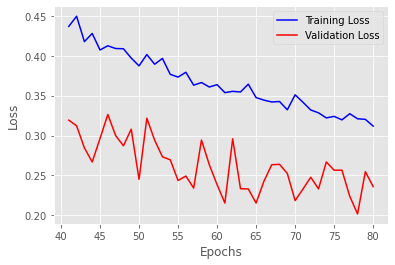

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

plt.style.use("ggplot")

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Courbe de la perte sur l'échantillon d'entrainement
plt.plot(np.arange(epochs_start_value , epochs_start_value + epochs_added, 1),
         training_history.history['loss'],
         label = 'Training Loss',
         color = 'blue')

# Courbe de la perte sur l'échantillon de validation
plt.plot(np.arange(epochs_start_value , epochs_start_value + epochs_added, 1),
         training_history.history['val_loss'], 
         label = 'Validation Loss',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

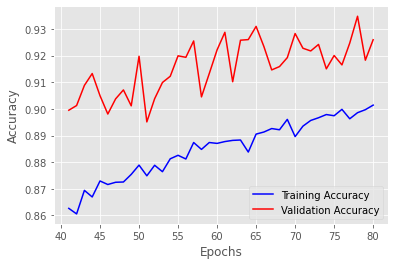

In [7]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de précision sur l'échantillon d'entrainement
plt.plot(np.arange(epochs_start_value , epochs_start_value + epochs_added, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de précision sur l'échantillon de validation
plt.plot(np.arange(epochs_start_value , epochs_start_value + epochs_added, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [8]:
from tensorflow import keras

path_cnn = res.dir_dataset + '_cnn_2_2.save'

classifier = keras.models.load_model(path_cnn)


## Phase de prédiction

Pas sur du tout de l'interprétation des résultats : **point à reprendre**

In [12]:
import numpy as np
from keras.preprocessing import image

# target_size = (128, 128) -> ce n'est pas la taille de l'image mais celle utilisée par le CNN -> voir intialisation CNN
# si la taille de l'image ne convient pas, le CNN la transformera
test_image = image.load_img(res.dir_dataset_test + os.sep + 'TomatoHealthy1.JPG', target_size = (128, 128))

# l'image peut ne pas être en 3 dimensions -> le CNN a été initialisé avec des images en 3 dimensions
# l'image est transformée en 3D -> RVB -> shape = (128, 128, 3)
test_image = image.img_to_array(test_image)

# une quatrième dimension est nécessaire -> celle-ci sert quand des groupes d'images sont utilisés
# axis = 0 -> la colonne qui est utilisée normalement pour les groupes est la colonne 0
test_image = np.expand_dims(test_image, axis = 0)
# Application d'un rescale équivalent à celui utilisé dans les ImageDataGenerator 
test_image = test_image / 255
# Récupérer l'indice de la classe prédite
result = classifier.predict(test_image)
result = np.argmax(result)
# Afficher l'indice de la classe prédite
print(result)
# Afficher le libellé de la classe prédite
print(list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(result)])


37
Tomato___healthy


## Conclusion

Comme attendu, l'augmentation du nombre d'epochs influt favorablement sur les scores du CNN, tant au niveau de l'entrainement que de la validation.

La courbe d'apprentissage semble maintenant vouloir converger vers un maximum même si on ne peut pas encore l'affirmer.

En tout cas, les scores sont encore bien meilleurs : pour la validation, le score oscille entre 92% et 93,5%.

Pour l'entrainement on note que la courbe est légèrement en deça de celle de validation.

Cet entrainement confirme la conclusion précédente, à savoir que le CNN n'est plus soumis au overfitting.